# Medicat Image Data Exploration

In [1]:
# import cv2
from PIL import Image 
# import torch
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
PATH = "C:/Medicat Dataset/release/figures/" # change this to the path to your medicat images

In [3]:
files = os.listdir(PATH)

In [4]:
files[:5]

['0001a0861408d93e3060af77404e5a23a6e66bb4_4-Figure2-1.png',
 '0001fa053dd15c74727a15ef55cfca51ea656f13_4-Figure3-1.png',
 '000257db192b5fa98f9689f1f42746e6564ced89_3-Figure4-1.png',
 '000280bcd5a0c2ff0680d29c491727f892ed4f5d_2-Figure1-1.png',
 '0004114d2a3bfbb83b9a9307b37e9979295a331a_2-Figure1-1.png']

Adding only image files to the list

In [5]:
img_names = []

for file in files:
    if file.endswith(".png"):
        img_names.append(file)

In [6]:
img_names[0]

'0001a0861408d93e3060af77404e5a23a6e66bb4_4-Figure2-1.png'

In [7]:
np.array(img_names).shape

(217002,)

**Note:** Some images have special characters as their name eg: "3d11444cbfa1f1a53f18460dcb0c23250cf10fa3_3-Figure6ΓÇô7-1.png" and it looks like OpenCV has trouble reading filenames with such special characters. So, I used PIL and it seemed to do the trick. Further, "ffd83b6453f94f2a1ddb346e324f5bdbf228c1f3_4-Figure3-1.png" appears to be corrupted.

In [8]:
%%time
height_list = []
width_list = []
img_names_list = [] # final image names (not corrupt or NoneType)
width_list_names = []

for img_name in img_names: # checked run time for a few images before this
    img_path = PATH + img_name
    
    try:
        img = Image.open(img_path)
        
    except:
        print("Exception: ", img_path) # printing the names of any corrupted images in the dataset
        continue

    if img is None:
        print("NoneType: ", img_path)
        continue

    height_list.append(img.size[1])
    width_list.append(img.size[0])
    
    img_names_list.append(img_name)
    

Exception:  C:/Medicat Dataset/release/figures/ffd83b6453f94f2a1ddb346e324f5bdbf228c1f3_4-Figure3-1.png
CPU times: total: 1min 7s
Wall time: 1min 45s


In [9]:
def print_stuff(h, w, i): # print everything that we need
    
    print("height shape: ", np.array(h).shape)
    print("height mean: ", np.mean(h))
    print("height median: ", np.median(h))
    print("height max: ", np.max(h))
    print("height min: ", np.min(h))
    
    print("\n")
    print("width shape: ", np.array(w).shape)
    print("width mean: ", np.mean(w))
    print("width median: ", np.median(w))
    print("width max: ", np.max(w))
    print("width min: ", np.min(w))
    
    print("\n")
    print("img names shape: ", np.array(i).shape)
    print("position of imgs with max height: ", np.where(np.array(h) == max(h))[0][0])
    print("position of imgs with min height: ", np.where(np.array(h) == min(h))[0][0])
    print("position of imgs with max width: ", np.where(np.array(w) == max(w))[0][0])
    print("position of imgs with min width: ", np.where(np.array(w) == min(w))[0][0])

In [10]:
print_stuff(height_list, width_list, img_names_list)

height shape:  (217001,)
height mean:  717.4914032654227
height median:  638.0
height max:  7012
height min:  54


width shape:  (217001,)
width mean:  917.8712079667836
width median:  926.0
width max:  5950
width min:  144


img names shape:  (217001,)
position of imgs with max height:  92920
position of imgs with min height:  106221
position of imgs with max width:  92920
position of imgs with min width:  38819


'6ddbc2e69e7bccc91d08b5c44781bee2c345742a_10-Figure5-1.png'

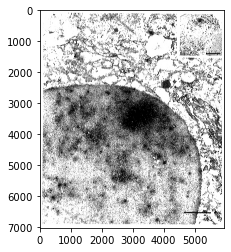

In [11]:
img_max_h = Image.open(PATH + img_names_list[92920])
plt.imshow(np.asarray(img_max_h))
img_names_list[92920]

'7daa458b27c591ae58e8011cc121d3d63e67c791_10-Figure3-1.png'

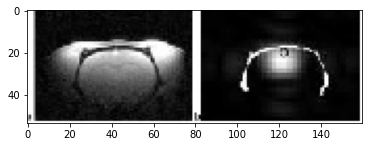

In [12]:
img_min_h = Image.open(PATH + img_names_list[106221])
plt.imshow(np.asarray(img_min_h))
img_names_list[106221]

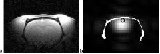

In [13]:
display(img_min_h)

'6ddbc2e69e7bccc91d08b5c44781bee2c345742a_10-Figure5-1.png'

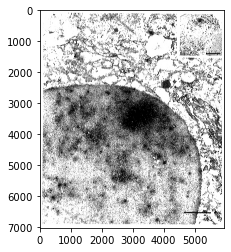

In [14]:
img_max_w = Image.open(PATH + img_names_list[92920])
# display(img_max_w) # same as img_max_h
plt.imshow(np.asarray(img_max_w))
img_names_list[92920]

'2e18fee2efda96306f4197332d38e340b6541329_16-Figure3-1.png'

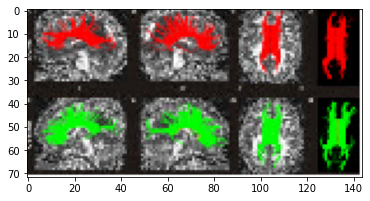

In [15]:
img_min_w = Image.open(PATH +  img_names_list[38819])
plt.imshow(np.asarray(img_min_w))
img_names_list[38819]

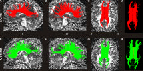

In [16]:
display(img_min_w)